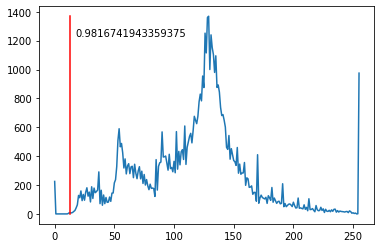

True


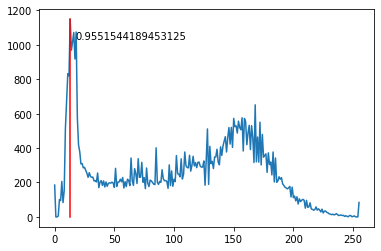

True


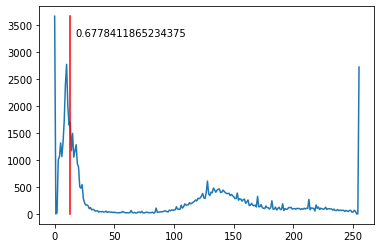

True


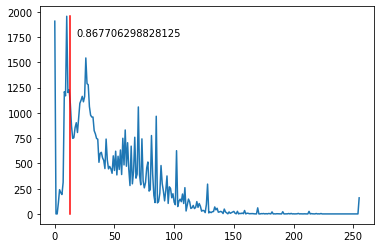

True


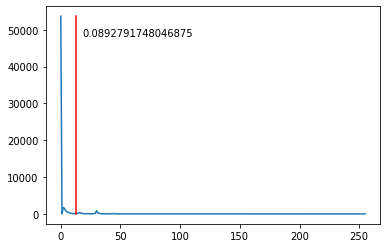

False


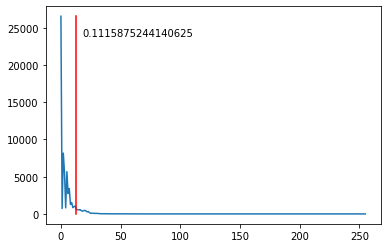

False


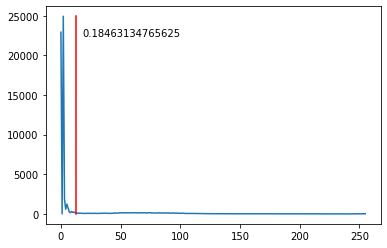

False


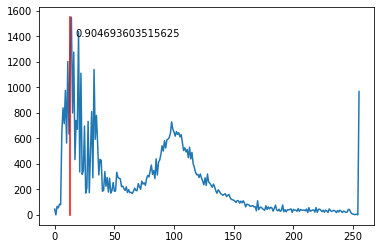

True


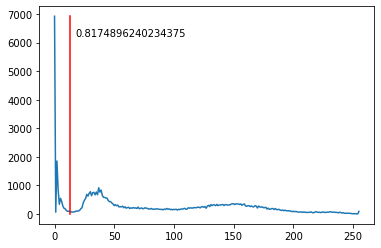

True


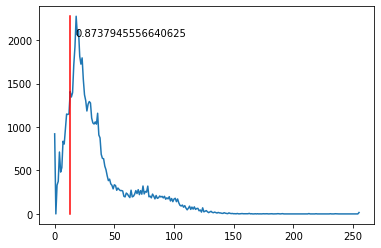

True


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io           # Only needed for web grabbing images, use cv2.imread for local images


def is_valid(image):

    # Convert image to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate histogram of saturation channel
    s = cv2.calcHist([image], [1], None, [256], [0, 256])

    # Calculate percentage of pixels with saturation >= p
    p = 0.05
    s_perc = np.sum(s[int(p * 255):-1]) / np.prod(image.shape[0:2])

    ##### Just for visualization and debug; remove in final
    plt.plot(s)
    plt.plot([p * 255, p * 255], [0, np.max(s)], 'r')
    plt.text(p * 255 + 5, 0.9 * np.max(s), str(s_perc))
    plt.show()
    ##### Just for visualization and debug; remove in final

    # Percentage threshold; above: valid image, below: noise
    s_thr = 0.5
    return s_perc > s_thr


# Read example images; convert to RGB format
noise1 = cv2.cvtColor(io.imread('resized/image00000.jpeg'), cv2.COLOR_RGB2BGR)
noise2 = cv2.cvtColor(io.imread('resized/image00001.jpeg'), cv2.COLOR_RGB2BGR)
noise3 = cv2.cvtColor(io.imread('resized/image00021.jpeg'), cv2.COLOR_RGB2BGR)
noise4 = cv2.cvtColor(io.imread('resized/image00030.jpeg'), cv2.COLOR_RGB2BGR)
noise5 = cv2.cvtColor(io.imread('resized/image00074.jpeg'), cv2.COLOR_RGB2BGR)
noise6 = cv2.cvtColor(io.imread('resized/image00095.jpeg'), cv2.COLOR_RGB2BGR)
noise7 = cv2.cvtColor(io.imread('resized/image00106.jpeg'), cv2.COLOR_RGB2BGR)
noise8 = cv2.cvtColor(io.imread('resized/image00567.jpeg'), cv2.COLOR_RGB2BGR)
noise9 = cv2.cvtColor(io.imread('resized/image00788.jpeg'), cv2.COLOR_RGB2BGR)
noise10 = cv2.cvtColor(io.imread('resized/image00999.jpeg'), cv2.COLOR_RGB2BGR)
# valid = cv2.cvtColor(io.imread('train1/ILSVRC2012_val_00005011.JPEG'), cv2.COLOR_RGB2BGR)

for img in [noise1, noise2, noise3, noise4, noise5, noise6, noise7, noise8, noise9, noise10]:
    print(is_valid(img))